# Predicting Height in cm.

### context:
Our solution provides digital measurement for children for below age less than 5 years to detect and reduce malnutrition.
The provided dataset contains a csv file and depthmap images of childrens. The rows in csv file contains the entry for children and their corresponding pose prediction and height in cm and depthmap file id. The raw depthmap files are also provided in the depthmap folder.
Total 9 records of children have been provided for code development purpose.

### Problem statement:
Given the dataset of depthmap images and corresponsing pose key points and height of the children, Design the solution and write the code which can be used to train a model and predict the height of the children. You are free to choose approach be it a Machine learning, Deep Learning or any other approaches along with having the reason of selecting for the same. 

In [1]:
import os
import pandas as pd
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(torch.__version__)

1.13.1+cpu


In [3]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torchvision.transforms as T
from torchvision.utils import make_grid

# Exploring the images

- See the image files and vizualise them
- Annotate images
- probability_score(may be if possible)

##### Image Data and vizualise them

In [4]:
Dir = 'C:/Users/Rjbha/Desktop/dwarf ai/DS_Assignment 2/DS_Assignment 2/depthmap'
labels = os.listdir(Dir+'/depthmap/')
print('the labels of the images are:')
print('--------------------------------')
for d in labels:
    print(d)

the labels of the images are:
--------------------------------
1d5fee00-ada4-11eb-a80b-3f50af21830f.jpg
1eddf4c0-ad9f-11eb-a80b-ef4adba049aa.jpg
38e29bc0-8fc0-11eb-b5f2-0742da91b282.jpg
6cd5d480-8b8b-11eb-b152-f7b115384fa9.jpg
76ed6fc0-8e1d-11eb-ad70-7be1a1219834.jpg
8d23fa60-9201-11eb-b3e6-cbfb48c6a300.jpg
9dc3eba0-8d8d-11eb-8d3f-4776be867c61.jpg
9dd020a0-8d8d-11eb-8d3f-bfd9f6bd04d4.jpg
d3757800-8dff-11eb-a328-472d4f8db277.jpg


In [5]:
image_data = ImageFolder(Dir, transform=T.Compose(
    [T.ToTensor()]
                                                 )
                        )

In [6]:
def show_images(images, nmax=4):
    fig, ax = plt.subplots(figsize=(2,2))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images.detach()[:nmax], nrow=2).permute(1, 2, 0))

def show_images_(dl, nmax=4):
    for images, _ in dl:
        show_images(images, nmax)

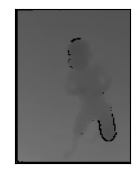

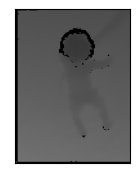

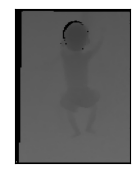

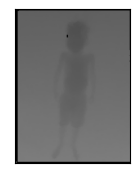

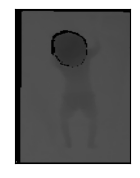

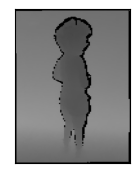

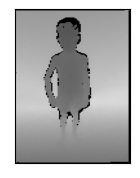

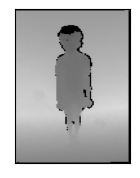

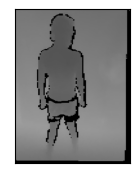

In [7]:
show_images_(image_data)

#### Annotate Images
- for finding coordinates of bounding boxes for head used labelImage for annotation.


In [10]:
# #  
# # 

# a = open(Dir+'/labels/1d5fee00-ada4-11eb-a80b-3f50af21830f.txt','r')

# r = a.read()
# r

# # head_df_x =
# # head_df = pd.DataFrame(head_df, index='infer')
# # head_df
           


# # 1eddf4c0-ad9f-11eb-a80b-ef4adba049aa.jpg
# # 38e29bc0-8fc0-11eb-b5f2-0742da91b282.jpg
# # 6cd5d480-8b8b-11eb-b152-f7b115384fa9.jpg
# # 76ed6fc0-8e1d-11eb-ad70-7be1a1219834.jpg
# # 8d23fa60-9201-11eb-b3e6-cbfb48c6a300.jpg
# # 9dc3eba0-8d8d-11eb-8d3f-4776be867c61.jpg
# # 9dd020a0-8d8d-11eb-8d3f-bfd9f6bd04d4.jpg
# # d3757800-8dff-11eb-a328-472d4f8db277.jpg


In [11]:
head_x = [0.560417, 0.532292, 0.528125,
         0.537500, 0.466667, 0.498958,
         0.459375, 0.478125, 0.409375]

head_y = [0.292969, 0.228125, 0.171875, 
          0.178125, 0.260156, 0.173437,
         0.153906, 0.185156, 0.136719]                      

head_w = [0.229167, 0.318750, 0.239583,
         0.212500, 0.316667, 0.352083,
         0.231250, 0.235417, 0.243750] 
 
head_h = [0.214062, 0.212500, 0.196875,
         0.190625, 0.239063, 0.262500,
         0.214062, 0.176563, 0.214062]
head_coord = pd.DataFrame({'Head_x': head_x,
                           'Head_y': head_y, 
                           'Head_w': head_w, 
                           'Head_h': head_h})
head_coord

,Head_x,Head_y,Head_w,Head_h
0,0.560417,0.292969,0.229167,0.214062
1,0.532292,0.228125,0.318750,0.212500
2,0.528125,0.171875,0.239583,0.196875
3,0.537500,0.178125,0.212500,0.190625
4,0.466667,0.260156,0.316667,0.239063
5,0.498958,0.173437,0.352083,0.262500
6,0.459375,0.153906,0.231250,0.214062
7,0.478125,0.185156,0.235417,0.176563
8,0.409375,0.136719,0.243750,0.214062


#### Now we have dataframe for coordinates of head

# Exploring height and pose dataset

In [12]:
hp_df = pd.read_excel('height_and_pose.xlsx')
hp_df.head(10)

,Depthmap Image,Height(cm),Pose
0,1d5fee00-ada4-11eb-a80b-3f50af21830f,76.7,"[{'bbox_coordinates': [(158.91087, 92.53168), ..."
1,1eddf4c0-ad9f-11eb-a80b-ef4adba049aa,66.4,"[{'bbox_coordinates': [(131.00702, 68.115364),..."
2,38e29bc0-8fc0-11eb-b5f2-0742da91b282,63.2,"[{'bbox_coordinates': [(116.070114, 37.567608)..."
3,6cd5d480-8b8b-11eb-b152-f7b115384fa9,87.1,"[{'bbox_coordinates': [(145.24242, 26.49348), ..."
4,76ed6fc0-8e1d-11eb-ad70-7be1a1219834,59.1,"[{'bbox_coordinates': [(150.17046, 65.00379), ..."
5,8d23fa60-9201-11eb-b3e6-cbfb48c6a300,86.4,"[{'bbox_coordinates': [(146.97789, 37.342777),..."
6,9dc3eba0-8d8d-11eb-8d3f-4776be867c61,100.6,"[{'bbox_coordinates': [(135.09724, 42.205784),..."
7,9dd020a0-8d8d-11eb-8d3f-bfd9f6bd04d4,106.1,"[{'bbox_coordinates': [(167.52087, 52.946323),..."
8,d3757800-8dff-11eb-a328-472d4f8db277,99.9,"[{'bbox_coordinates': [(92.025406, 19.148962),..."


- pose column contains several metadata
- so we will create other feature out of that col.

# Feature Engineering

In [13]:
pose_co = hp_df.Pose
pose_co

0    [{'bbox_coordinates': [(158.91087, 92.53168), ...
1    [{'bbox_coordinates': [(131.00702, 68.115364),...
2    [{'bbox_coordinates': [(116.070114, 37.567608)...
3    [{'bbox_coordinates': [(145.24242, 26.49348), ...
4    [{'bbox_coordinates': [(150.17046, 65.00379), ...
5    [{'bbox_coordinates': [(146.97789, 37.342777),...
6    [{'bbox_coordinates': [(135.09724, 42.205784),...
7    [{'bbox_coordinates': [(167.52087, 52.946323),...
8    [{'bbox_coordinates': [(92.025406, 19.148962),...
Name: Pose, dtype: object

In [14]:
pose_co.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9 entries, 0 to 8
Series name: Pose
Non-Null Count  Dtype 
--------------  ----- 
9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


In [15]:
pose_co[0]

"[{'bbox_coordinates': [(158.91087, 92.53168), (396.85934, 616.8171)], 'bbox_confidence_score': [0.99280316], 'key_points_coordinate': [{'nose': {'x': 265.9385, 'y': 182.3019}}, {'left_eye': {'x': 289.8317, 'y': 168.64862}}, {'right_eye': {'x': 245.45859, 'y': 165.2353}}, {'left_ear': {'x': 317.13824, 'y': 178.88858}}, {'right_ear': {'x': 221.56538, 'y': 172.06195}}, {'left_shoulder': {'x': 334.20483, 'y': 233.50165}}, {'right_shoulder': {'x': 221.56538, 'y': 243.7416}}, {'left_elbow': {'x': 378.57794, 'y': 284.7014}}, {'right_elbow': {'x': 194.25885, 'y': 308.5946}}, {'left_wrist': {'x': 358.09805, 'y': 342.72778}}, {'right_wrist': {'x': 235.21864, 'y': 315.42123}}, {'left_hip': {'x': 341.03146, 'y': 393.92752}}, {'right_hip': {'x': 269.3518, 'y': 404.16748}}, {'left_knee': {'x': 354.68472, 'y': 506.56696}}, {'right_knee': {'x': 231.80533, 'y': 486.08707}}, {'left_ankle': {'x': 313.7249, 'y': 489.50037}}, {'right_ankle': {'x': 214.73874, 'y': 547.52673}}], 'key_points_prob': [{'nose':

In [16]:
type(eval(pose_co[1][1:-1]))


dict

#### since pose is dictionary, we can make another variable out of it.

1. make dict 
2. extract coordinate for x,y,w,h

###### coordinates for the following :
    1. nose
    2. left_eye
    3. right_eye
    4. left_ear
    5. right_ear
    6. left_shoulder
    7. Right_shoulder
    8. left_hip
    9. right_hip
4. body_pose_score

###### probability scores for following landmarks:

    1. nose
    2. left_eye
    3. right_eye
    4. left_ear
    5. right_ear
    6. left_shoulder
    7. Right_shoulder
    8. left_hip
    9. right_hip
    * suffix p is added, it means probability
6. merging datasets

* we excluded other key point coordinates beacause coordinates tend to change according to capture during a pose. eg.a hand can be raised while posing which could result to variances in coordinates of wrist and elbow.


##### 1. making dict

In [17]:
# lets check if its in dictionary format or not
type(eval(pose_co[1][1:-1]))#['bbox_coordinates']) # [0][0] #(x,y,h,w)

dict

In [18]:
# Since Pose variable is string
# if we remove "" from it it will be dictionary

#lets define a function for removing "" from each row

# mpda - Make Pose Dict Again

def mpda(string):
    return eval(string[1:-1])

In [19]:
po_new = pose_co.map(lambda x: mpda(x))

In [20]:
po_new[0]['bbox_coordinates'][0][0]

158.91087

In [21]:
po_new

0    {'bbox_coordinates': [(158.91087, 92.53168), (...
1    {'bbox_coordinates': [(131.00702, 68.115364), ...
2    {'bbox_coordinates': [(116.070114, 37.567608),...
3    {'bbox_coordinates': [(145.24242, 26.49348), (...
4    {'bbox_coordinates': [(150.17046, 65.00379), (...
5    {'bbox_coordinates': [(146.97789, 37.342777), ...
6    {'bbox_coordinates': [(135.09724, 42.205784), ...
7    {'bbox_coordinates': [(167.52087, 52.946323), ...
8    {'bbox_coordinates': [(92.025406, 19.148962), ...
Name: Pose, dtype: object

##### 2. extracting coordinates for x,y, w, h 

In [22]:
# extracting bbox_coordinates
coords = [d.get('bbox_coordinates') for d in po_new]

In [23]:
type(coords)

list

In [24]:
coords

[[(158.91087, 92.53168), (396.85934, 616.8171)],
 [(131.00702, 68.115364), (420.1891, 559.3997)],
 [(116.070114, 37.567608), (395.045, 542.00757)],
 [(145.24242, 26.49348), (346.4439, 637.2346)],
 [(150.17046, 65.00379), (373.36887, 611.4233)],
 [(146.97789, 37.342777), (323.04355, 616.20996)],
 [(135.09724, 42.205784), (308.40625, 609.4822)],
 [(167.52087, 52.946323), (322.8788, 583.97754)],
 [(92.025406, 19.148962), (295.21625, 625.0551)]]

In [25]:
# making coords a dataframe
coords = pd.DataFrame(coords)

In [26]:
coords#[0]#[0][0]

,0,1
0,"(158.91087, 92.53168)","(396.85934, 616.8171)"
1,"(131.00702, 68.115364)","(420.1891, 559.3997)"
2,"(116.070114, 37.567608)","(395.045, 542.00757)"
3,"(145.24242, 26.49348)","(346.4439, 637.2346)"
4,"(150.17046, 65.00379)","(373.36887, 611.4233)"
5,"(146.97789, 37.342777)","(323.04355, 616.20996)"
6,"(135.09724, 42.205784)","(308.40625, 609.4822)"
7,"(167.52087, 52.946323)","(322.8788, 583.97754)"
8,"(92.025406, 19.148962)","(295.21625, 625.0551)"


#### Now above is the data for the box coordinates of x, y, w, h. in the format of (x,y) in 0th col and (w,h) in 1st col.
#### so we got to extract coordinates for each point and make separate col for that.


In [27]:
coords[0]

0      (158.91087, 92.53168)
1     (131.00702, 68.115364)
2    (116.070114, 37.567608)
3      (145.24242, 26.49348)
4      (150.17046, 65.00379)
5     (146.97789, 37.342777)
6     (135.09724, 42.205784)
7     (167.52087, 52.946323)
8     (92.025406, 19.148962)
Name: 0, dtype: object

In [28]:
# extracting data for x coordinates of bounding box
x = [i[0] for i in coords[0]]
    
# extracting data for y coordinates of bounding box
y = [i[1] for i in coords[0]]

    
# extracting data for w coordinates of bounding box
w = [i[0] for i in coords[1]]

    
# extracting data for h coordinates of bounding box
h = [i[1] for i in coords[1]]
    
# extracting bbox_confidence_score

bbox_confidence_score = [d.get('bbox_confidence_score') for d in po_new]
bbox_confidence_score = [item[0] for item in bbox_confidence_score]
# extracting body pose score
body_pose_score =[d.get('body_pose_score') for d in po_new]

key_coord_df = pd.DataFrame({'Coord_x': x,
              'Coord_y': y,
              'Coord_w':w,
              'Coord_h': h,
              'bbox_confidence_score': bbox_confidence_score,
              'body_pose_score': body_pose_score
            })

In [29]:
key_coord_df

,Coord_x,Coord_y,Coord_w,Coord_h,bbox_confidence_score,body_pose_score
0,158.910870,92.531680,396.85934,616.81710,0.992803,0.932521
1,131.007020,68.115364,420.18910,559.39970,0.996291,0.778794
2,116.070114,37.567608,395.04500,542.00757,0.986349,0.877052
3,145.242420,26.493480,346.44390,637.23460,0.999383,0.955477
4,150.170460,65.003790,373.36887,611.42330,0.996907,0.853830
5,146.977890,37.342777,323.04355,616.20996,0.998899,0.908704
6,135.097240,42.205784,308.40625,609.48220,0.999632,0.960757
7,167.520870,52.946323,322.87880,583.97754,0.999605,0.961107
8,92.025406,19.148962,295.21625,625.05510,0.999628,0.915556


In [30]:
# def extract_pose_info(information):
    
#     eval(string[1:-1])   # this will remove "" around and ultimately return a dict
    
#     # extracting bbox_coordinates
#     coords = [d.get('bbox_coordinates') for d in po_new]
#     coords = pd.DataFrame(coords)
    
#     # extracting data for x coordinates of bounding box
#     x = [i[0] for i in coords[0]]
    
#     # extracting data for y coordinates of bounding box
#     y = [i[1] for i in coords[0]]

    
#     # extracting data for w coordinates of bounding box
#     w = [i[0] for i in coords[1]]

    
#     # extracting data for h coordinates of bounding box
#     h = [i[1] for i in coords[1]]
    
#     # extracting bbox_confidence_score
#     bbox_confidence_score = [d.get('bbox_confidence_score') for d in po_new]

#     return pd.DataFrame({'Coord_x': x,
#                          'Coord_y': y,
#                          'Coord_w':w,
#                          'Coord_h': h,
#                          'bbox_confidence_score': bbox_confidence_score,
                         
#                         })
    
    

In [31]:
coord_key_points = [d.get('key_points_coordinate') for d in po_new]

In [32]:
coord_key_points

[[{'nose': {'x': 265.9385, 'y': 182.3019}},
  {'left_eye': {'x': 289.8317, 'y': 168.64862}},
  {'right_eye': {'x': 245.45859, 'y': 165.2353}},
  {'left_ear': {'x': 317.13824, 'y': 178.88858}},
  {'right_ear': {'x': 221.56538, 'y': 172.06195}},
  {'left_shoulder': {'x': 334.20483, 'y': 233.50165}},
  {'right_shoulder': {'x': 221.56538, 'y': 243.7416}},
  {'left_elbow': {'x': 378.57794, 'y': 284.7014}},
  {'right_elbow': {'x': 194.25885, 'y': 308.5946}},
  {'left_wrist': {'x': 358.09805, 'y': 342.72778}},
  {'right_wrist': {'x': 235.21864, 'y': 315.42123}},
  {'left_hip': {'x': 341.03146, 'y': 393.92752}},
  {'right_hip': {'x': 269.3518, 'y': 404.16748}},
  {'left_knee': {'x': 354.68472, 'y': 506.56696}},
  {'right_knee': {'x': 231.80533, 'y': 486.08707}},
  {'left_ankle': {'x': 313.7249, 'y': 489.50037}},
  {'right_ankle': {'x': 214.73874, 'y': 547.52673}}],
 [{'nose': {'x': 305.9835, 'y': 200.21199}},
  {'left_eye': {'x': 197.23564, 'y': 152.235}},
  {'right_eye': {'x': 305.9835, 'y': 

In [33]:
coord_key_points = [item for sublist in coord_key_points for item in sublist]

In [34]:
coord_key_points

[{'nose': {'x': 265.9385, 'y': 182.3019}},
 {'left_eye': {'x': 289.8317, 'y': 168.64862}},
 {'right_eye': {'x': 245.45859, 'y': 165.2353}},
 {'left_ear': {'x': 317.13824, 'y': 178.88858}},
 {'right_ear': {'x': 221.56538, 'y': 172.06195}},
 {'left_shoulder': {'x': 334.20483, 'y': 233.50165}},
 {'right_shoulder': {'x': 221.56538, 'y': 243.7416}},
 {'left_elbow': {'x': 378.57794, 'y': 284.7014}},
 {'right_elbow': {'x': 194.25885, 'y': 308.5946}},
 {'left_wrist': {'x': 358.09805, 'y': 342.72778}},
 {'right_wrist': {'x': 235.21864, 'y': 315.42123}},
 {'left_hip': {'x': 341.03146, 'y': 393.92752}},
 {'right_hip': {'x': 269.3518, 'y': 404.16748}},
 {'left_knee': {'x': 354.68472, 'y': 506.56696}},
 {'right_knee': {'x': 231.80533, 'y': 486.08707}},
 {'left_ankle': {'x': 313.7249, 'y': 489.50037}},
 {'right_ankle': {'x': 214.73874, 'y': 547.52673}},
 {'nose': {'x': 305.9835, 'y': 200.21199}},
 {'left_eye': {'x': 197.23564, 'y': 152.235}},
 {'right_eye': {'x': 305.9835, 'y': 181.0212}},
 {'left_e

In [35]:
# coordinates of key points
a = [d.get('nose') for d in coord_key_points]
nose = []
for i in a:
    if i != None:
        nose.append(i)
        
nose = pd.DataFrame(nose)
nose.columns=['Nose_x', 'Nose_y']

b = [d.get('left_eye') for d in coord_key_points]
left_eye = []
for i in b:
    if i != None:
        left_eye.append(i)
        
left_eye = pd.DataFrame(left_eye)
left_eye.columns=['Left_eye_x', 'Left_eye_y']

c = [d.get('right_eye') for d in coord_key_points]
right_eye = []
for i in c:
    if i != None:
        right_eye.append(i)
        
right_eye = pd.DataFrame(right_eye)
right_eye.columns=['Right_eye_x', 'Right_eye_y']

d = [d.get('left_ear') for d in coord_key_points]
left_ear = []
for i in d:
    if i != None:
        left_ear.append(i)
        
left_ear = pd.DataFrame(left_ear)
left_ear.columns=['Left_ear_x', 'Left_ear_y']

e = [d.get('right_ear') for d in coord_key_points]
right_ear = []
for i in e:
    if i != None:
        right_ear.append(i)
        
right_ear = pd.DataFrame(right_ear)
right_ear.columns=['Right_ear_x', 'Right_ear_y']


f = [d.get('left_shoulder') for d in coord_key_points]
left_shoulder = []
for i in f:
    if i != None:
        left_shoulder.append(i)
        
left_shoulder = pd.DataFrame(left_shoulder)
left_shoulder.columns=['Left_shoulder_x', 'Left_shoulder_y']

h = [d.get('right_shoulder') for d in coord_key_points]
right_shoulder = []
for i in h:
    if i != None:
        right_shoulder.append(i)
        
right_shoulder = pd.DataFrame(right_shoulder)
right_shoulder.columns=['Right_shoulder_x', 'Right_shoulder_y']


j = [d.get('left_hip') for d in coord_key_points]
left_hip = []
for i in j:
    if i != None:
        left_hip.append(i)
        
left_hip = pd.DataFrame(left_hip)
left_hip.columns=['Left_hip_x', 'Left_hip_y']

k = [d.get('right_hip') for d in coord_key_points]
right_hip = []
for i in k:
    if i != None:
        right_hip.append(i)
        
right_hip = pd.DataFrame(right_hip)
right_hip.columns=['Right_hip_x', 'Right_hip_y']


In [36]:
probab_key_points = [d.get('key_points_prob') for d in po_new]
probab_key_points = [item for sublist in probab_key_points for item in sublist]

In [37]:
probab_key_points

[{'nose': {'score': 0.9733702}},
 {'left_eye': {'score': 0.9789531}},
 {'right_eye': {'score': 0.9747643}},
 {'left_ear': {'score': 0.9491323}},
 {'right_ear': {'score': 0.93967146}},
 {'left_shoulder': {'score': 0.93360823}},
 {'right_shoulder': {'score': 0.93219453}},
 {'left_elbow': {'score': 0.9705547}},
 {'right_elbow': {'score': 0.9635779}},
 {'left_wrist': {'score': 0.95338464}},
 {'right_wrist': {'score': 0.93387914}},
 {'left_hip': {'score': 0.9077342}},
 {'right_hip': {'score': 0.8869987}},
 {'left_knee': {'score': 0.7880519}},
 {'right_knee': {'score': 0.9456413}},
 {'left_ankle': {'score': 0.8660142}},
 {'right_ankle': {'score': 0.9553187}},
 {'nose': {'score': 0.4369605}},
 {'left_eye': {'score': 0.39362335}},
 {'right_eye': {'score': 0.4418358}},
 {'left_ear': {'score': 0.77515286}},
 {'right_ear': {'score': 0.77589005}},
 {'left_shoulder': {'score': 0.9076336}},
 {'right_shoulder': {'score': 0.92320937}},
 {'left_elbow': {'score': 0.8591538}},
 {'right_elbow': {'score': 

In [38]:
# probability socre of the landmarks

aa = [d.get('nose') for d in probab_key_points]
nose_p = []
for i in aa:
    if i != None:
        nose_p.append(i['score'])
        
nose_p = pd.DataFrame(nose_p)
nose_p.columns=['Nose_p']

bb = [d.get('left_eye') for d in probab_key_points]
left_eye_p = []
for i in bb:
    if i != None:
        left_eye_p.append(i['score'])
        
left_eye_p = pd.DataFrame(left_eye_p)
left_eye_p.columns=['Left_eye_p']

cc = [d.get('right_eye') for d in probab_key_points]
right_eye_p = []
for i in cc:
    if i != None:
        right_eye_p.append(i['score'])
        
right_eye_p = pd.DataFrame(right_eye_p)
right_eye_p.columns=['Right_eye_p']

dd = [d.get('left_ear') for d in probab_key_points]
left_ear_p = []
for i in dd:
    if i != None:
        left_ear_p.append(i['score'])
        
left_ear_p = pd.DataFrame(left_ear_p)
left_ear_p.columns=['Left_ear_p']

ee = [d.get('right_ear') for d in probab_key_points]
right_ear_p = []
for i in ee:
    if i != None:
        right_ear_p.append(i['score'])
        
right_ear_p = pd.DataFrame(right_ear_p)
right_ear_p.columns=['Right_ear_p']


ff = [d.get('left_shoulder') for d in probab_key_points]
left_shoulder_p = []
for i in ff:
    if i != None:
        left_shoulder_p.append(i['score'])
        
left_shoulder_p = pd.DataFrame(left_shoulder_p)
left_shoulder_p.columns=['Left_shoulder_p']

hh = [d.get('right_shoulder') for d in probab_key_points]
right_shoulder_p = []
for i in hh:
    if i != None:
        right_shoulder_p.append(i['score'])
        
right_shoulder_p = pd.DataFrame(right_shoulder_p)
right_shoulder_p.columns=['Right_shoulder_p']


jj = [d.get('left_hip') for d in probab_key_points]
left_hip_p = []
for i in jj:
    if i != None:
        left_hip_p.append(i['score'])
        
left_hip_p = pd.DataFrame(left_hip_p)
left_hip_p.columns=['Left_hip_p']

kk = [d.get('right_hip') for d in probab_key_points]
right_hip_p = []
for i in kk:
    if i != None:
        right_hip_p.append(i['score'])
        
right_hip_p = pd.DataFrame(right_hip_p)
right_hip_p.columns=['Right_hip_p']


## Merging dataframes


In [39]:
list_dfs = [nose, left_eye, right_eye, left_ear, right_ear, left_shoulder, right_shoulder, left_hip, right_hip, 
           nose_p, left_eye_p, right_eye_p, left_ear_p, right_ear_p, left_shoulder_p, right_shoulder_p, left_hip_p, right_hip_p]

In [40]:
key_point_cord_df = pd.concat(list_dfs, axis = 1)

In [41]:
key_point_cord_df

,Nose_x,Nose_y,Left_eye_x,Left_eye_y,Right_eye_x,Right_eye_y,Left_ear_x,Left_ear_y,Right_ear_x,Right_ear_y,...,Right_hip_y,Nose_p,Left_eye_p,Right_eye_p,Left_ear_p,Right_ear_p,Left_shoulder_p,Right_shoulder_p,Left_hip_p,Right_hip_p
0,265.93850,182.30190,289.83170,168.648620,245.45859,165.235300,317.13824,178.88858,221.56538,172.06195,...,404.16748,0.973370,0.978953,0.974764,0.949132,0.939671,0.933608,0.932195,0.907734,0.886999
1,305.98350,200.21199,197.23564,152.235000,305.98350,181.021200,216.42644,177.82274,286.79270,197.01353,...,350.53990,0.436960,0.393623,0.441836,0.775153,0.775890,0.907634,0.923209,0.851971,0.940192
2,191.51735,123.93983,201.36969,123.939830,299.89313,137.076300,198.08557,150.21274,299.89313,140.36040,...,357.11194,0.642427,0.786445,0.746642,0.936630,0.914513,0.928049,0.939268,0.876880,0.855791
3,239.87890,142.99553,263.73596,127.090805,223.97418,127.090805,295.54540,135.04317,208.06947,135.04317,...,369.63776,0.961691,0.967028,0.972166,0.951405,0.911385,0.970071,0.941079,0.909324,0.926732
4,167.49805,155.00647,171.05548,151.449040,174.61288,151.449040,213.74450,169.23615,295.56512,147.89163,...,350.66450,0.586811,0.789953,0.430133,0.808867,0.689470,0.853346,0.893991,0.890535,0.890383
5,304.73105,143.99603,300.96237,128.921370,293.42505,128.921370,233.12637,136.45871,236.89505,140.22737,...,373.88470,0.965228,0.919332,0.988522,0.719816,0.965830,0.923811,0.939936,0.832527,0.797001
6,212.51872,161.49629,227.29155,143.030270,194.05269,143.030270,256.83720,139.33707,171.89346,139.33707,...,349.84980,0.966567,0.970822,0.970862,0.974736,0.964913,0.969217,0.960762,0.916506,0.891225
7,222.72783,157.70052,240.01399,136.957100,208.89888,140.414350,267.67188,143.87158,195.06995,150.78606,...,361.67734,0.979862,0.982591,0.983962,0.961013,0.947403,0.952890,0.932652,0.899878,0.898619
8,235.04018,126.83931,235.04018,118.949905,242.92958,111.060500,148.25676,115.00520,235.04018,111.06050,...,371.41080,0.789297,0.595065,0.874249,0.959430,0.976819,0.957883,0.950110,0.872890,0.899166


In [42]:
# since hp_df is our main dataframe form we obtained these cols
# there are 3 cols Depthmap_image, Height and Pose
# we will create a new df having Depthmap_image and Height cols, since we dont need pose col.

In [43]:
height_cm = hp_df[['Depthmap Image', 'Height(cm)']]
height_cm

,Depthmap Image,Height(cm)
0,1d5fee00-ada4-11eb-a80b-3f50af21830f,76.7
1,1eddf4c0-ad9f-11eb-a80b-ef4adba049aa,66.4
2,38e29bc0-8fc0-11eb-b5f2-0742da91b282,63.2
3,6cd5d480-8b8b-11eb-b152-f7b115384fa9,87.1
4,76ed6fc0-8e1d-11eb-ad70-7be1a1219834,59.1
5,8d23fa60-9201-11eb-b3e6-cbfb48c6a300,86.4
6,9dc3eba0-8d8d-11eb-8d3f-4776be867c61,100.6
7,9dd020a0-8d8d-11eb-8d3f-bfd9f6bd04d4,106.1
8,d3757800-8dff-11eb-a328-472d4f8db277,99.9


In [44]:
key_coord_df

,Coord_x,Coord_y,Coord_w,Coord_h,bbox_confidence_score,body_pose_score
0,158.910870,92.531680,396.85934,616.81710,0.992803,0.932521
1,131.007020,68.115364,420.18910,559.39970,0.996291,0.778794
2,116.070114,37.567608,395.04500,542.00757,0.986349,0.877052
3,145.242420,26.493480,346.44390,637.23460,0.999383,0.955477
4,150.170460,65.003790,373.36887,611.42330,0.996907,0.853830
5,146.977890,37.342777,323.04355,616.20996,0.998899,0.908704
6,135.097240,42.205784,308.40625,609.48220,0.999632,0.960757
7,167.520870,52.946323,322.87880,583.97754,0.999605,0.961107
8,92.025406,19.148962,295.21625,625.05510,0.999628,0.915556


In [45]:
# now we have 3 dfs viz.,
# height_cm
# key_coord_df
# key_point_cord_df

# lets merge them together and this will be our final dataframe.

final_df = pd.concat([height_cm,
                      key_coord_df,
                      key_point_cord_df,
                     head_coord], axis = 1)

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Depthmap Image         9 non-null      object 
 1   Height(cm)             9 non-null      float64
 2   Coord_x                9 non-null      float64
 3   Coord_y                9 non-null      float64
 4   Coord_w                9 non-null      float64
 5   Coord_h                9 non-null      float64
 6   bbox_confidence_score  9 non-null      float64
 7   body_pose_score        9 non-null      float64
 8   Nose_x                 9 non-null      float64
 9   Nose_y                 9 non-null      float64
 10  Left_eye_x             9 non-null      float64
 11  Left_eye_y             9 non-null      float64
 12  Right_eye_x            9 non-null      float64
 13  Right_eye_y            9 non-null      float64
 14  Left_ear_x             9 non-null      float64
 15  Left_ear_y

- we have 34 columns, and 9 rows

# Data preprocessing

In [47]:
# we have to predict height
# so height is our target variable
# we dont need Depthmap Image for prediction as it is a pure string and holds no significance.
# and rest are independent variable
X = final_df.drop(columns = ['Height(cm)', 'Depthmap Image'])
y = final_df['Height(cm)']


In [48]:
X

,Coord_x,Coord_y,Coord_w,Coord_h,bbox_confidence_score,body_pose_score,Nose_x,Nose_y,Left_eye_x,Left_eye_y,...,Left_ear_p,Right_ear_p,Left_shoulder_p,Right_shoulder_p,Left_hip_p,Right_hip_p,Head_x,Head_y,Head_w,Head_h
0,158.910870,92.531680,396.85934,616.81710,0.992803,0.932521,265.93850,182.30190,289.83170,168.648620,...,0.949132,0.939671,0.933608,0.932195,0.907734,0.886999,0.560417,0.292969,0.229167,0.214062
1,131.007020,68.115364,420.18910,559.39970,0.996291,0.778794,305.98350,200.21199,197.23564,152.235000,...,0.775153,0.775890,0.907634,0.923209,0.851971,0.940192,0.532292,0.228125,0.318750,0.212500
2,116.070114,37.567608,395.04500,542.00757,0.986349,0.877052,191.51735,123.93983,201.36969,123.939830,...,0.936630,0.914513,0.928049,0.939268,0.876880,0.855791,0.528125,0.171875,0.239583,0.196875
3,145.242420,26.493480,346.44390,637.23460,0.999383,0.955477,239.87890,142.99553,263.73596,127.090805,...,0.951405,0.911385,0.970071,0.941079,0.909324,0.926732,0.537500,0.178125,0.212500,0.190625
4,150.170460,65.003790,373.36887,611.42330,0.996907,0.853830,167.49805,155.00647,171.05548,151.449040,...,0.808867,0.689470,0.853346,0.893991,0.890535,0.890383,0.466667,0.260156,0.316667,0.239063
5,146.977890,37.342777,323.04355,616.20996,0.998899,0.908704,304.73105,143.99603,300.96237,128.921370,...,0.719816,0.965830,0.923811,0.939936,0.832527,0.797001,0.498958,0.173437,0.352083,0.262500
6,135.097240,42.205784,308.40625,609.48220,0.999632,0.960757,212.51872,161.49629,227.29155,143.030270,...,0.974736,0.964913,0.969217,0.960762,0.916506,0.891225,0.459375,0.153906,0.231250,0.214062
7,167.520870,52.946323,322.87880,583.97754,0.999605,0.961107,222.72783,157.70052,240.01399,136.957100,...,0.961013,0.947403,0.952890,0.932652,0.899878,0.898619,0.478125,0.185156,0.235417,0.176563
8,92.025406,19.148962,295.21625,625.05510,0.999628,0.915556,235.04018,126.83931,235.04018,118.949905,...,0.959430,0.976819,0.957883,0.950110,0.872890,0.899166,0.409375,0.136719,0.243750,0.214062


# Training the model

In [49]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [50]:
model.fit(X,y)

RandomForestRegressor()

# Prediction

In [51]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    return model.predict(input_df)[0]

In [52]:
# # lets try with this record which is no 6.
# "[{'bbox_coordinates': [(135.09724, 42.205784), (308.40625, 609.4822)], 
# 'bbox_confidence_score': [0.99963164], 
#     'key_points_coordinate': [{'nose': {'x': 212.51872, 'y': 161.49629}}, 
#                               {'left_eye': {'x': 227.29155, 'y': 143.03027}}, 
#                               {'right_eye': {'x': 194.05269, 'y': 143.03027}}, 
#                               {'left_ear': {'x': 256.8372, 'y': 139.33707}}, 
#                               {'right_ear': {'x': 171.89346, 'y': 139.33707}}, 
#                               {'left_shoulder': {'x': 271.61002, 'y': 216.8944}}, 
#                               {'right_shoulder': {'x': 160.81384, 'y': 220.5876}}, 
#                               {'left_elbow': {'x': 286.38284, 'y': 301.83813}}, 
#                               {'right_elbow': {'x': 149.73422, 'y': 305.53134}}, 
#                               {'left_wrist': {'x': 290.07605, 'y': 372.00903}}, 
#                               {'right_wrist': {'x': 149.73422, 'y': 379.39545}}, 
#                               {'left_hip': {'x': 253.144, 'y': 349.8498}}, 
#                               {'right_hip': {'x': 190.35948, 'y': 349.8498}}, 
#                               {'left_knee': {'x': 245.75758, 'y': 449.56638}}, 
#                               {'right_knee': {'x': 190.35948, 'y': 453.25958}}, 
#                               {'left_ankle': {'x': 238.37117, 'y': 519.7373}}, 
#                               {'right_ankle': {'x': 194.05269, 'y': 530.8169}}], 
#         'key_points_prob': [{'nose': {'score': 0.96656704}}, 
#                             {'left_eye': {'score': 0.97082233}}, 
#                             {'right_eye': {'score': 0.9708621}}, 
#                             {'left_ear': {'score': 0.9747356}}, 
#                             {'right_ear': {'score': 0.96491295}}, 
#                             {'left_shoulder': {'score': 0.9692168}}, 
#                             {'right_shoulder': {'score': 0.96076185}}, 
#                             {'left_elbow': {'score': 0.97749966}}, 
#                             {'right_elbow': {'score': 0.973418}}, 
#                             {'left_wrist': {'score': 0.9505402}}, 
#                             {'right_wrist': {'score': 0.9545565}}, 
#                             {'left_hip': {'score': 0.9165057}}, 
#                             {'right_hip': {'score': 0.89122516}}, 
#                             {'left_knee': {'score': 0.9670094}}, 
#                             {'right_knee': {'score': 0.975727}}, 
#                             {'left_ankle': {'score': 0.992385}}, 
#                             {'right_ankle': {'score': 0.95612895}}], 
#             'body_pose_score': 0.9607573}]"
# head(x,y,w, h) = 0.459375, 0.153906, 0.231250, 0.214062
#              
#             height :100.6  
    
sample_input = {
                'Coord_x':135.09724, 'Coord_y':42.205784, 'Coord_w':308.40625, 'Coord_h':609.4822, 
                'bbox_confidence_score': 0.99963164, 'body_pose_score':0.9607573,
                'Nose_x':212.51872, 'Nose_y':161.49629, 'Left_eye_x':227.29155,'Left_eye_y':143.03027, 
                'Right_eye_x': 194.05269, 'Right_eye_y':143.03027,
                'Left_ear_x':256.8372, 'Left_ear_y':139.33707, 'Right_ear_x':171.89346, 'Right_ear_y':139.33707,
               'Left_shoulder_x':220.5876, 'Left_shoulder_y':216.8944, 'Right_shoulder_x':160.81384,
                'Right_shoulder_y':160.81384, 'Left_hip_x':253.144, 'Left_hip_y':349.8498, 'Right_hip_x':190.35948,
                'Right_hip_y':349.8498, 'Nose_p':0.96656704, 'Left_eye_p':0.97082233, 'Right_eye_p':0.9708621, 
                'Left_ear_p':0.9747356, 'Right_ear_p':0.96491295, 'Left_shoulder_p':0.9692168,
                'Right_shoulder_p':0.96076185, 'Left_hip_p':0.9165057, 'Right_hip_p':0.89122516, 
                'Head_x': 0.459375,'Head_y':0.153906,'Head_w':0.231250,'Head_h':0.214062,
               } 

In [53]:
predicted_height = predict_input(sample_input)

In [54]:
print('The predicted height in cm is {}'.format(predicted_height))

The predicted height in cm is 97.15600000000013


In [57]:
100.6-97.156

3.4439999999999884

#### difference in prediction is 3.443 cm